In [1]:
# project: p10
# submitter-netid: yzeng58
# partner-netid: ymao49

In [2]:
import requests
import pandas as pd
from pandas import DataFrame, Series
from bs4 import BeautifulSoup
import os
import json
import math
import numpy as np
import sqlite3
import matplotlib
%matplotlib inline

In [3]:
#q1
url1 = 'https://tyler.caraza-harter.com/cs301/spring19/data/countries.json'
countries = pd.read_json(url1)
sum(countries["area"])

127493303

In [4]:
#q2
base2 = 'https://tyler.caraza-harter.com/cs301/spring19/data/'
url2 = 'https://tyler.caraza-harter.com/cs301/spring19/data/capitals/manifest.txt'
resp2 = requests.get(url2)
resp2.raise_for_status
html2 = resp2.text
html2.split('\n')[0]

'Brazil_Peru.json'

In [5]:
def write_json(path, data):     
    with open(path, 'w', encoding="utf-8") as f:         
        return json.dump(data, f, indent=2)

In [6]:
def get_json(url):
    base = url.split('/')[-1]
    if os.path.exists(base):
        f = open(base)
        file = json.load(f)
        f.close()
    else:
        resp = requests.get(url)
        resp.raise_for_status
        file = resp.json()
        write_json(base,file)
    return(file)

In [7]:
files = html2.split('\n')[:-1]
home = base2 + 'capitals/'
urls = [home+file for file in files]
urls

['https://tyler.caraza-harter.com/cs301/spring19/data/capitals/Brazil_Peru.json',
 'https://tyler.caraza-harter.com/cs301/spring19/data/capitals/ElSalvador_SaintHelena.json',
 'https://tyler.caraza-harter.com/cs301/spring19/data/capitals/Ghana_Belize.json',
 'https://tyler.caraza-harter.com/cs301/spring19/data/capitals/Palau_Nigeria.json',
 'https://tyler.caraza-harter.com/cs301/spring19/data/capitals/Portugal_Somalia.json',
 'https://tyler.caraza-harter.com/cs301/spring19/data/capitals/Seychelles_Cuba.json',
 'https://tyler.caraza-harter.com/cs301/spring19/data/capitals/Slovenia_Estonia.json',
 'https://tyler.caraza-harter.com/cs301/spring19/data/capitals/Tanzania_Swaziland.json',
 'https://tyler.caraza-harter.com/cs301/spring19/data/capitals/Vanuatu_Tajikistan.json']

In [8]:
capital_rows = []
for url in urls:
    capital_rows += get_json(url)

In [9]:
#q3
capital_rows

[{'capital': 'Brasilia',
  'country': 'Brazil',
  'latitude': -15.783333333333333,
  'longitude': -47.916667},
 {'capital': 'Nouakchott',
  'country': 'Mauritania',
  'latitude': 18.066666666666666,
  'longitude': -15.966667000000001},
 {'capital': 'Bern',
  'country': 'Switzerland',
  'latitude': 46.91666666666666,
  'longitude': 7.466667},
 {'capital': 'Zagreb',
  'country': 'Croatia',
  'latitude': 45.8,
  'longitude': 16.0},
 {'capital': 'Cairo',
  'country': 'Egypt',
  'latitude': 30.05,
  'longitude': 31.25},
 {'capital': 'Sanaa',
  'country': 'Yemen',
  'latitude': 15.35,
  'longitude': 44.2},
 {'capital': 'Helsinki',
  'country': 'Finland',
  'latitude': 60.16666666666666,
  'longitude': 24.933332999999998},
 {'capital': 'Addis Ababa',
  'country': 'Ethiopia',
  'latitude': 9.033333333333333,
  'longitude': 38.7},
 {'capital': 'Prague',
  'country': 'Czech Republic',
  'latitude': 50.08333333333334,
  'longitude': 14.466667000000001},
 {'capital': 'Maseru',
  'country': 'Lesoth

In [10]:
capitals = DataFrame(capital_rows)
capitals

,capital,country,latitude,longitude
0,Brasilia,Brazil,-15.783333,-47.916667
1,Nouakchott,Mauritania,18.066667,-15.966667
2,Bern,Switzerland,46.916667,7.466667
3,Zagreb,Croatia,45.800000,16.000000
4,Cairo,Egypt,30.050000,31.250000
5,Sanaa,Yemen,15.350000,44.200000
6,Helsinki,Finland,60.166667,24.933333
7,Addis Ababa,Ethiopia,9.033333,38.700000
8,Prague,Czech Republic,50.083333,14.466667
9,Maseru,Lesotho,-29.316667,27.483333


In [11]:
countries

,area,birth-rate,coastline,continent,country,death-rate,gdp-per-capita,infant-mortality,literacy,net-migration,phones,population,region
0,756950,15.23,0.85,South America,Chile,5.81,9900,8.80,"96,2",0.00,"213,0",16134219,LATIN AMER. & CARIB
1,665,17.80,24.21,Asia,Bahrain,4.14,16900,17.27,"89,1",1.05,"281,3",698585,NEAR EAST
2,22966,28.84,1.68,North America,Belize,5.72,4900,25.69,"94,1",0.00,"115,7",287730,LATIN AMER. & CARIB
3,582650,39.72,0.09,Africa,Kenya,14.02,1000,61.47,"85,1",-0.10,"8,1",34707817,SUB-SAHARAN AFRICA
4,11854,33.05,3.12,Australia,Marshall Islands,4.78,1600,29.45,"93,7",-6.04,"91,2",60422,OCEANIA
5,111370,44.77,0.52,Africa,Liberia,23.10,1000,128.87,"57,5",0.00,"2,3",3042004,SUB-SAHARAN AFRICA
6,504782,10.06,0.98,Europe,Spain,9.72,22000,4.42,"97,9",0.99,"453,5",40397842,WESTERN EUROPE
7,65610,15.51,2.04,Asia,Sri Lanka,6.52,3700,14.35,"92,3",-1.31,"61,5",20222240,ASIA (EX. NEAR EAST)
8,212460,36.24,0.98,Asia,Oman,3.81,13100,19.51,"75,8",0.28,"85,5",3102229,NEAR EAST
9,316,10.22,62.28,Europe,Malta,8.10,17700,3.89,"92,8",2.07,"505,0",400214,WESTERN EUROPE


In [12]:
#q4
Series.item(capitals[capitals["country"] == "Bermuda"]["capital"])

'Hamilton'

In [13]:
#q5
Series.item(capitals[capitals["capital"] == "Maputo"]["country"])

'Mozambique'

In [14]:
#q6
list(capitals.sort_values(by="latitude")[:5]["country"])

['New Zealand', 'Australia', 'Uruguay', 'Argentina', 'Chile']

In [15]:
#q7
list(capitals.sort_values(by="latitude", ascending=False)[:3]["country"])

['Iceland', 'Finland', 'Norway']

In [16]:
#q8
countries.describe()[["birth-rate","death-rate"]]

,birth-rate,death-rate
count,175.000000,175.000000
mean,22.536114,9.654971
std,11.287090,5.187216
min,8.250000,2.410000
25%,12.635000,6.075000
50%,20.340000,8.230000
75%,30.200000,11.965000
max,50.730000,29.740000


In [17]:
def change_format(strnum):
    strnum = '.'.join(strnum.split(','))
    return float(strnum)

In [18]:
#q9
countries9 = countries

#======================Another method=========================
#countries9["literacy"] = Series(list(map(change_format, countries["literacy"])))
#countries9["phones"] = Series(list(map(change_format, countries["phones"])))
#countries9.describe()[["literacy","phones"]]

countries9["literacy"] = countries9["literacy"].str.replace(',','.').astype(float)
countries9["phones"] = countries9["phones"].str.replace(',','.').astype(float)
countries9.describe()[["literacy","phones"]]

,literacy,phones
count,175.000000,175.000000
mean,82.182286,214.621143
std,20.086897,218.613971
min,17.600000,1.300000
25%,69.950000,31.300000
50%,92.000000,140.100000
75%,98.000000,329.700000
max,100.000000,1035.600000


In [19]:
#q10
list(countries[(countries["coastline"] == 0) & (countries["continent"] == "Europe")].sort_values(by="area", ascending=False)["country"])[0]

'Belarus'

In [20]:
#q11
list(countries[(countries["coastline"] == 0) & (countries["continent"] == "Africa")].sort_values(by="area", ascending=False)["country"])[0]

'Chad'

In [21]:
#q12
list(countries[(countries["coastline"] == 0) & (countries["continent"] == "South America")].sort_values(by="area", ascending=False)["country"])[0]

'Bolivia'

In [22]:
def distance(lat1,lon1,lat2,lon2):
    lon1 = math.radians(lon1)
    lat1 = math.radians(lat1)
    lon2 = math.radians(lon2)
    lat2 = math.radians(lat2)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * np.arcsin(min(1,math.sqrt(a)))
    d = 3956*c
    return d

In [23]:
#q13
distance(43.070231,-89.411893,43.074645,-89.384113)

1.433899492072933

In [24]:
#q14
India_lat = capitals["latitude"][capitals["country"] == "India"].astype(float)
India_lon = capitals["longitude"][capitals["country"] == "India"].astype(float)
Brazil_lat = capitals["latitude"][capitals["country"] == "Brazil"].astype(float)
Brazil_lon = capitals["longitude"][capitals["country"] == "Brazil"].astype(float)
distance(India_lat,India_lon,Brazil_lat,Brazil_lon)

8840.574141306946

In [25]:
#q15
q15 = ["Chile","Guyana","Colombia"]
q15distance = {}
for row in q15:
    q15distance[row]={}
    Brazil_lat = capitals["latitude"][capitals["country"] == row].astype(float)
    Brazil_lon = capitals["longitude"][capitals["country"] == row].astype(float)
    for column in q15:
        if row != column:
            India_lat = capitals["latitude"][capitals["country"] == column].astype(float)
            India_lon = capitals["longitude"][capitals["country"] == column].astype(float)           
            q15distance[row][column] = distance(India_lat,India_lon,Brazil_lat,Brazil_lon)
        else:
            q15distance[row][column] = None
DataFrame(q15distance)

,Chile,Guyana,Colombia
Chile,NaN,2897.553095,2636.644599
Colombia,2636.644599,1105.066312,NaN
Guyana,2897.553095,NaN,1105.066312


In [26]:
#q16
q16 = list(countries[countries["continent"] == "South America"]["country"])
q16distance = {}
for row in q16:
    q16distance[row]={}
    Brazil_lat = capitals["latitude"][capitals["country"] == row].astype(float)
    Brazil_lon = capitals["longitude"][capitals["country"] == row].astype(float)
    for column in q16:
        if row != column:
            India_lat = capitals["latitude"][capitals["country"] == column].astype(float)
            India_lon = capitals["longitude"][capitals["country"] == column].astype(float)           
            q16distance[row][column] = distance(India_lat,India_lon,Brazil_lat,Brazil_lon)
        else:
            q16distance[row][column] = None
q16_df = DataFrame(q16distance)
q16_df

,Chile,Guyana,Colombia,Suriname,Brazil,Bolivia,Venezuela,Argentina,Peru,Ecuador,Uruguay,Paraguay
Argentina,690.784168,2857.520462,2885.355610,2799.886429,1459.139733,1379.455702,3157.624051,NaN,1936.465790,2696.149591,143.069943,646.036442
Bolivia,1180.741903,1747.772670,1512.119255,1778.772975,1342.297074,NaN,1865.131181,1379.455702,669.926372,1326.758656,1467.253638,906.799256
Brazil,1869.737031,1709.071018,2275.516286,1572.674233,NaN,1342.297074,2228.690680,1459.139733,1967.770515,2344.584922,1412.096335,908.185709
Chile,NaN,2897.553095,2636.644599,2895.810776,1869.737031,1180.741903,3043.657689,690.784168,1531.480189,2350.207788,833.403262,963.635535
Colombia,2636.644599,1105.066312,NaN,1303.405134,2275.516286,1512.119255,639.361118,2885.355610,1167.505359,451.004119,2962.230943,2337.615967
Ecuador,2350.207788,1483.193753,451.004119,1661.699022,2344.584922,1326.758656,1088.064118,2696.149591,823.054491,NaN,2791.196721,2218.650964
Guyana,2897.553095,NaN,1105.066312,215.336336,1709.071018,1747.772670,646.969843,2857.520462,1837.860149,1483.193753,2878.638295,2214.288286
Paraguay,963.635535,2214.288286,2337.615967,2153.855447,908.185709,906.799256,2544.799572,646.036442,1558.635236,2218.650964,667.699386,NaN
Peru,1531.480189,1837.860149,1167.505359,1944.750017,1967.770515,669.926372,1705.418003,1936.465790,NaN,823.054491,2046.571589,1558.635236
Suriname,2895.810776,215.336336,1303.405134,NaN,1572.674233,1778.772975,861.456786,2799.886429,1944.750017,1661.699022,2809.744412,2153.855447


In [27]:
#q17
q16_df.mean().sort_values().index[0]

'Bolivia'

In [28]:
#q18
q16_df.mean().sort_values().index[-1]

'Uruguay'

In [29]:
#q19
q19_value = dict(q16_df.min())
q19_idx = dict(q16_df.idxmin())
q19={"nearest":{},"distance":{}}
for country in q19_value:
    q19["nearest"][country] = q19_idx[country]
    q19["distance"][country] = q19_value[country]
q19_df = DataFrame(q19)
q19_df

,nearest,distance
Argentina,Uruguay,143.069943
Bolivia,Peru,669.926372
Brazil,Paraguay,908.185709
Chile,Argentina,690.784168
Colombia,Ecuador,451.004119
Ecuador,Colombia,451.004119
Guyana,Suriname,215.336336
Paraguay,Argentina,646.036442
Peru,Bolivia,669.926372
Suriname,Guyana,215.336336


In [30]:
#q20
q20_value = dict(q16_df.max())
q20_idx = dict(q16_df.idxmax())
q20={"furthest":{},"distance":{}}
for country in q19_value:
    q20["furthest"][country] = q20_idx[country]
    q20["distance"][country] = q20_value[country]
q20_df = DataFrame(q20)
q20_df

,furthest,distance
Argentina,Venezuela,3157.624051
Bolivia,Venezuela,1865.131181
Brazil,Ecuador,2344.584922
Chile,Venezuela,3043.657689
Colombia,Uruguay,2962.230943
Ecuador,Uruguay,2791.196721
Guyana,Chile,2897.553095
Paraguay,Venezuela,2544.799572
Peru,Uruguay,2046.571589
Suriname,Chile,2895.810776


In [31]:
conn = sqlite3.connect('countries.db')
countries.to_sql("countries", conn, if_exists="replace", index=False)
capitals.to_sql("capitals", conn, if_exists="replace", index=False)

In [32]:
def qry(sql):
    return pd.read_sql(sql, conn)

In [33]:
#q21
q21 = qry("""
SELECT continent, COUNT(country) as `number of countries`
FROM countries
GROUP BY continent
ORDER BY `number of countries`
""")
q21

,continent,number of countries
0,Australia,12
1,South America,12
2,North America,24
3,Asia,38
4,Europe,41
5,Africa,48


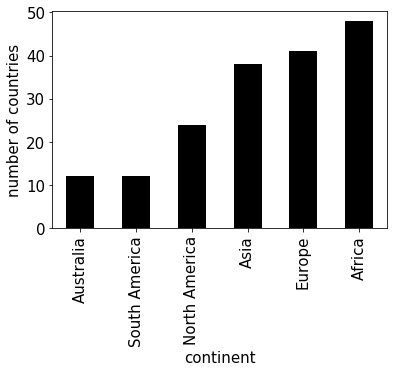

In [34]:
#q22
matplotlib.rcParams["font.size"] = 15
ax = q21.sort_index().plot.bar(x="continent", y="number of countries", color="black")
ax.set_ylabel("number of countries")
ax.get_legend().remove()
None

In [35]:
#q23
q23 = qry("""
SELECT continent, SUM(population)/1000000.0 as `total population (million)`
FROM countries
GROUP BY continent
ORDER BY `total population (million)` DESC
""")
q23

,continent,total population (million)
0,Asia,3739.902863
1,Africa,824.954038
2,Europe,792.053486
3,North America,515.041558
4,South America,375.441666
5,Australia,32.163025


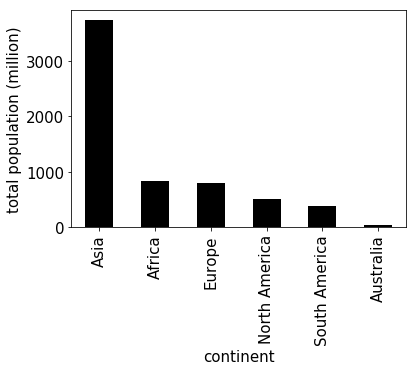

In [36]:
#q24
matplotlib.rcParams["font.size"] = 15
ax = q23.sort_index().plot.bar(x="continent", y="total population (million)", color="black")
ax.set_ylabel("total population (million)")
ax.get_legend().remove()
None

In [37]:
#q25
q25 = qry("""
SELECT country, population
FROM countries
WHERE continent = 'Australia'
ORDER BY population DESC
""")
#q25[q25["continent"] == "Australia"][["country","population"]]
q25

,country,population
0,Australia,20264082
1,Papua New Guinea,5670544
2,New Zealand,4076140
3,Fiji,905949
4,French Polynesia,274578
5,New Caledonia,219246
6,Vanuatu,208869
7,Samoa,176908
8,Guam,171019
9,Tonga,114689


In [38]:
#q26
q26 = qry("""
SELECT country, population*`gdp-per-capita`/1000000000.0 as `real GDP (billion)`
FROM countries
ORDER BY `real GDP (billion)` DESC
LIMIT 10
""")
q26

,country,real GDP (billion)
0,United States,11281.191327
1,China,6569.868565
2,Japan,3594.473830
3,India,3176.520785
4,Germany,2274.855452
5,France,1680.181354
6,United Kingdom,1678.873538
7,Italy,1552.164690
8,Brazil,1429.394525
9,Russia,1271.752506


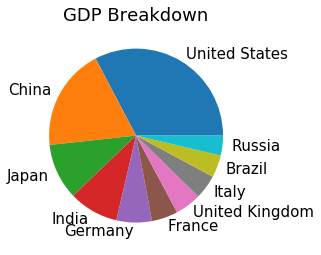

In [39]:
#q27
q26_1 = q26.set_index("country")
ax = q26_1.plot.pie(y="real GDP (billion)",title="GDP Breakdown")
ax.get_legend().remove()
ax.set_ylabel(None)
None

In [40]:
#q28
q28 = qry("""
SELECT country, `birth-rate`, "death-rate"
FROM countries
ORDER BY `birth-rate`-`death-rate` DESC
LIMIT 10
""")
q28

,country,birth-rate,death-rate
0,Uganda,47.35,12.24
1,Yemen,42.89,8.30
2,Mali,49.82,16.89
3,Oman,36.24,3.81
4,Madagascar,41.41,11.11
5,Burkina Faso,45.62,15.60
6,Niger,50.73,20.91
7,Chad,45.73,16.38
8,Mauritania,40.99,12.16
9,Burundi,42.22,13.46


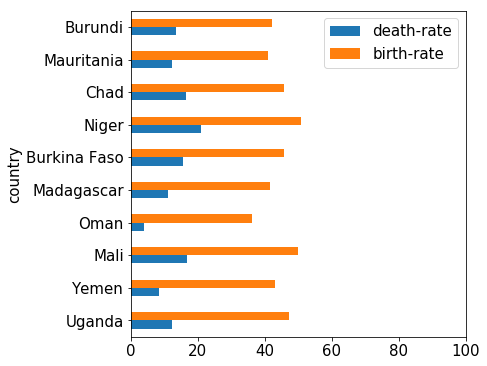

In [41]:
#q29
q29 = qry("""
SELECT country, `death-rate`, `birth-rate`
FROM countries
ORDER BY `birth-rate`-`death-rate` DESC
LIMIT 10
""").set_index("country")
ax = q29.plot.barh(figsize = (6,6))
ax.set_xticks([0,20,40,60,80,100])
None

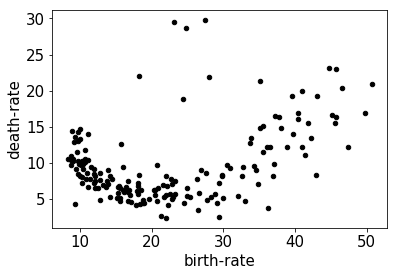

In [42]:
#q30
q30  = qry("""
SELECT country, `birth-rate`, "death-rate"
FROM countries
ORDER BY `birth-rate`-`death-rate` DESC
""")
q30.plot.scatter(x="birth-rate",y="death-rate",c="black")
None

In [43]:
#q31
q31 = qry("""
SELECT country, `birth-rate`, "death-rate"
FROM countries
WHERE `birth-rate` <= 30 and `death-rate` >15
ORDER BY `birth-rate`
LIMIT 6
""")
q31

,country,birth-rate,death-rate
0,South Africa,18.20,22.00
1,Botswana,23.08,29.50
2,Namibia,24.32,18.86
3,Lesotho,24.75,28.71
4,Swaziland,27.41,29.74
5,Zimbabwe,28.01,21.84


In [44]:
#q32
countries.corr().loc["birth-rate","death-rate"]

0.40037782919521714

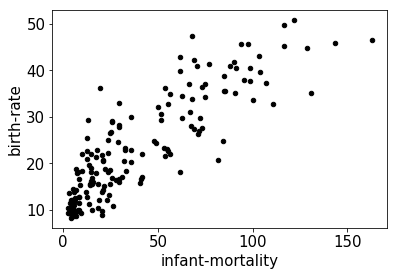

In [45]:
#q33
countries[["infant-mortality","birth-rate"]].plot.scatter(x="infant-mortality",y="birth-rate",c="black")
None

In [46]:
#q34
countries.corr().loc["infant-mortality","birth-rate"]

0.8687265678031416

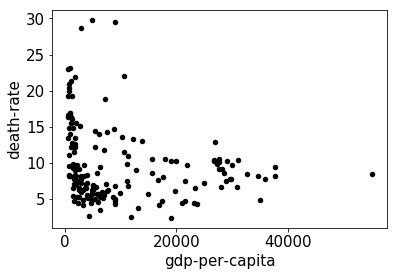

In [47]:
#q35
ax = countries.plot.scatter(x="gdp-per-capita",y="death-rate",c="black")
ax.set_xticks([0,20000,40000])
None

In [48]:
#q36
countries.corr().loc["gdp-per-capita","death-rate"]

-0.20995846867456752

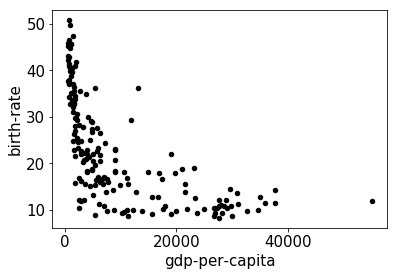

In [49]:
#q37
ax = countries.plot.scatter(x="gdp-per-capita",y="birth-rate",c="black")
ax.set_xticks([0,20000,40000])
None

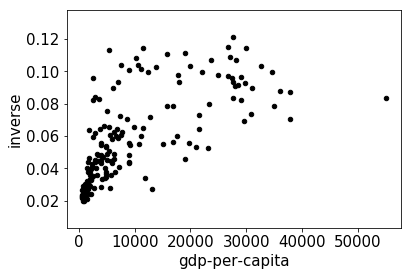

In [50]:
#q38
q38 = qry("""
SELECT `gdp-per-capita`, 1/`birth-rate` as `inverse`
FROM countries
""")
q38.plot.scatter(x="gdp-per-capita",y="inverse",c="black")
None

In [51]:
#q39
q38_df = q38
q38_df["1"] = 1
res = np.linalg.lstsq(q38_df[["gdp-per-capita","1"]], q38_df["inverse"], rcond=None)
coefficients = res[0] # coefficients is (m,n:
slope = coefficients[0] # slope
intercept = coefficients[1] # intercept
(slope, intercept)

(1.8422394400496347e-06, 0.039035043649535396)

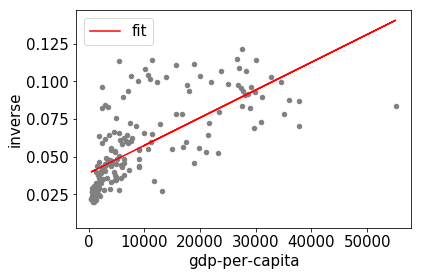

In [52]:
#q40
ax = q38_df.plot.scatter(x="gdp-per-capita", y='inverse',c="gray")
q38_df["fit"] = q38_df["gdp-per-capita"] * slope + intercept
q38_df.plot.line(x="gdp-per-capita", y='fit', c='red', ax=ax)
None

In [53]:
conn.close()